# 공공 인공지능 Open API 활용
- 여러가지 객체 검출

In [1]:
import urllib3
import json
import base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

In [2]:
with open('etriaikey.txt') as f:
    ai_key = f.read()

In [18]:
img_file =  '사진/공원.jpg'
img_type = img_file.split('.')[-1]
img_type

'jpg'

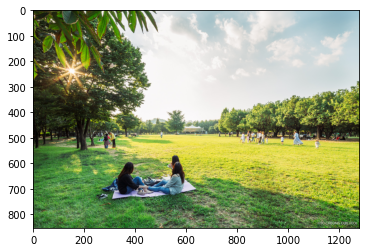

In [19]:
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open(img_file)
plt.imshow(image)
plt.show()

In [20]:
# # JFIF 타입은 JPG로 변경
# img_type = 'jpg' if img_type == '.jfif' else img_type[1:]
# img_type

In [21]:
with open(img_file, "rb") as file:
    img_contents = base64.b64encode(file.read()).decode("utf8")

In [22]:
request_json = {
    "access_key": ai_key,
    "argument": {
        "type": img_type,
        "file": img_contents
    }
}

In [23]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(request_json)
)

In [24]:
print("[responseCode] " + str(response.status))
print("[responBody]")
print(response.data)

[responseCode] 200
[responBody]
b'{"result":0,"return_object":{"data":[{"class":"person","confidence":"0.993701","x":"416","y":"568","width":"190","height":"160"},{"class":"person","confidence":"0.958099","x":"321","y":"592","width":"132","height":"130"},{"class":"person","confidence":"0.956546","x":"968","y":"488","width":"16","height":"41"},{"class":"person","confidence":"0.954333","x":"1100","y":"506","width":"24","height":"38"},{"class":"person","confidence":"0.907414","x":"496","y":"472","width":"12","height":"30"},{"class":"person","confidence":"0.894190","x":"303","y":"478","width":"23","height":"63"},{"class":"person","confidence":"0.695921","x":"809","y":"481","width":"18","height":"43"},{"class":"person","confidence":"0.645447","x":"273","y":"478","width":"22","height":"64"}]}}'


In [25]:
response.data

b'{"result":0,"return_object":{"data":[{"class":"person","confidence":"0.993701","x":"416","y":"568","width":"190","height":"160"},{"class":"person","confidence":"0.958099","x":"321","y":"592","width":"132","height":"130"},{"class":"person","confidence":"0.956546","x":"968","y":"488","width":"16","height":"41"},{"class":"person","confidence":"0.954333","x":"1100","y":"506","width":"24","height":"38"},{"class":"person","confidence":"0.907414","x":"496","y":"472","width":"12","height":"30"},{"class":"person","confidence":"0.894190","x":"303","y":"478","width":"23","height":"63"},{"class":"person","confidence":"0.695921","x":"809","y":"481","width":"18","height":"43"},{"class":"person","confidence":"0.645447","x":"273","y":"478","width":"22","height":"64"}]}}'

In [26]:
result = json.loads(response.data)
result

{'result': 0,
 'return_object': {'data': [{'class': 'person',
    'confidence': '0.993701',
    'x': '416',
    'y': '568',
    'width': '190',
    'height': '160'},
   {'class': 'person',
    'confidence': '0.958099',
    'x': '321',
    'y': '592',
    'width': '132',
    'height': '130'},
   {'class': 'person',
    'confidence': '0.956546',
    'x': '968',
    'y': '488',
    'width': '16',
    'height': '41'},
   {'class': 'person',
    'confidence': '0.954333',
    'x': '1100',
    'y': '506',
    'width': '24',
    'height': '38'},
   {'class': 'person',
    'confidence': '0.907414',
    'x': '496',
    'y': '472',
    'width': '12',
    'height': '30'},
   {'class': 'person',
    'confidence': '0.894190',
    'x': '303',
    'y': '478',
    'width': '23',
    'height': '63'},
   {'class': 'person',
    'confidence': '0.695921',
    'x': '809',
    'y': '481',
    'width': '18',
    'height': '43'},
   {'class': 'person',
    'confidence': '0.645447',
    'x': '273',
    'y': '47

## 시각화

In [27]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt 
%matplotlib inline

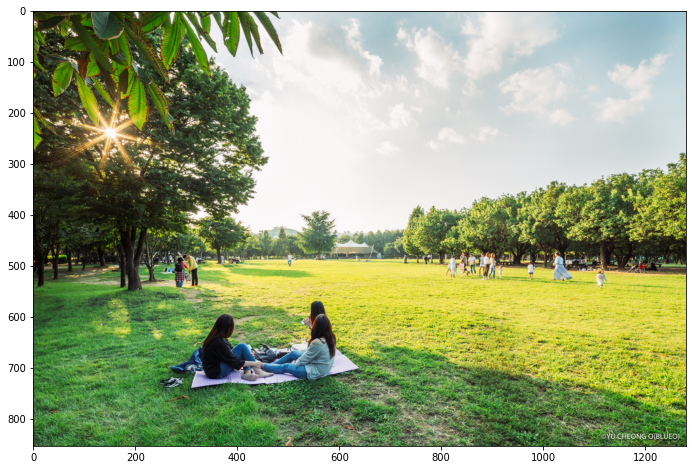

In [28]:
plt.figure(figsize=(12,8))
image = Image.open(img_file)
plt.imshow(image)
plt.show()

In [29]:
draw = ImageDraw.Draw(image)
obj_list = result['return_object']['data']
for obj in obj_list:
    name = obj['class']
    x = int(obj['x'])
    y = int(obj['y'])
    w = int(obj['width'])
    h = int(obj['height'])
    draw.text((x+10,y+10), name, font=ImageFont.truetype('malgun.ttf',20), fill=(255,0,0))
    draw.rectangle(((x,y), (x+w,y+h)), outline=(255,0,0), width=2)

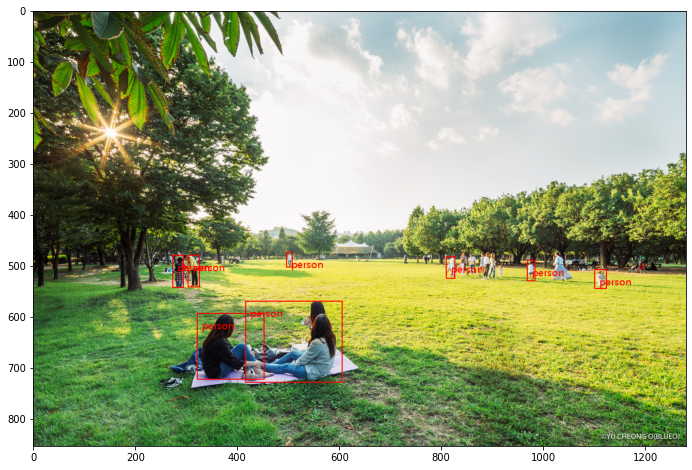

In [30]:
plt.figure(figsize=(12,8))
plt.imshow(image)
plt.show()

## 여러개의 그림 객체검출하기

In [32]:
from glob import glob
glob('사진/*.jpg')

['사진\\dog.jpg', '사진\\공원.jpg', '사진\\동물원.jpg']

In [37]:
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

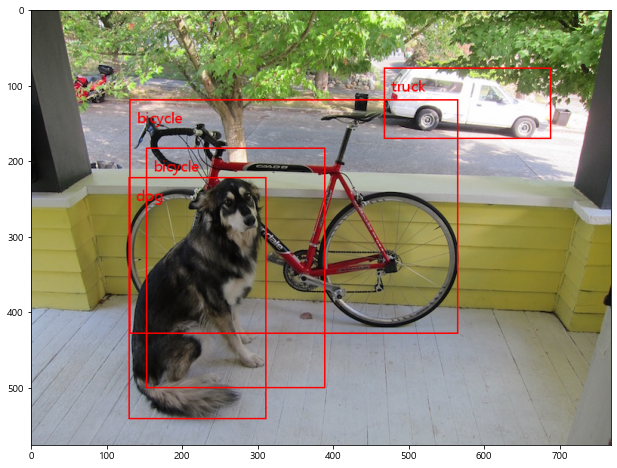

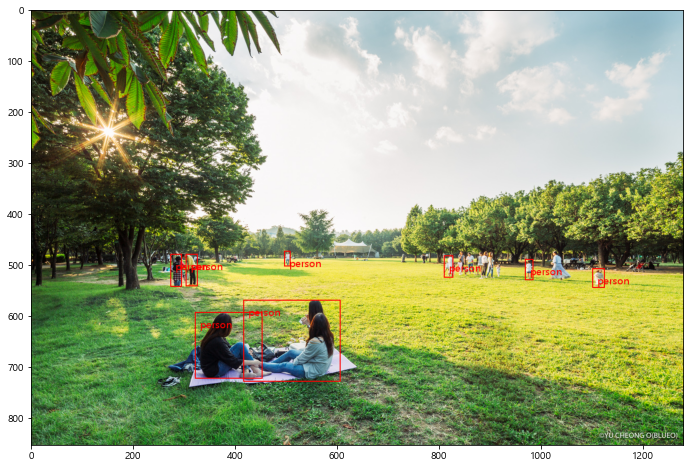

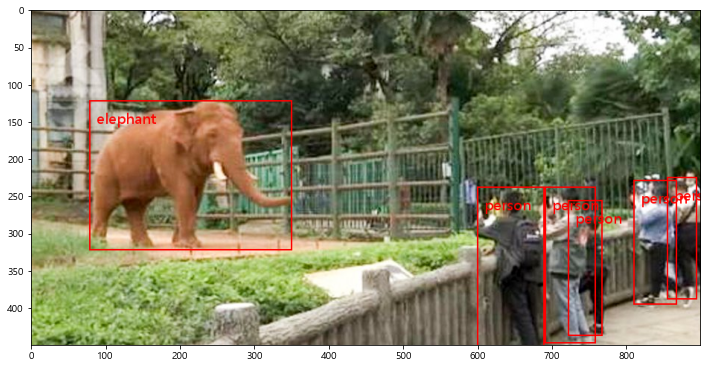

In [38]:
# http = urllib3.PoolManager() # 프로그램안에서 한 번만 실행하면 됨
for img_file in glob('사진/*.jpg'):
    _, img_type = os.path.splitext(img_file)
    img_type = 'jpg' if img_type == '.jfif' else img_type[1:]
    with open(img_file, 'rb') as file:
        img_contents = base64.b64encode(file.read()).decode("utf8")
    
    request_json = {
        "access_key": ai_key,
        "argument": {
            "type": img_type,
            "file": img_contents
        }
    }
    response = http.request(
        "POST",
        openApiURL,
        headers={"Content-Type": "application/json; charset=UTF-8"},
        body=json.dumps(request_json)
    )
    if response.status != 200:
        continue

    result = json.loads(response.data)
    obj_list = result['return_object']['data']
    image = Image.open(img_file)
    draw = ImageDraw.Draw(image)
    
    for obj in obj_list:
        name = obj['class']
        x = int(obj['x'])
        y = int(obj['y'])
        w = int(obj['width'])
        h = int(obj['height'])
        draw.text((x+10,y+10), name, font=ImageFont.truetype('malgun.ttf',20), fill=(255,0,0))
        draw.rectangle(((x,y), (x+w,y+h)), outline=(255,0,0), width=2)
    
    plt.figure(figsize=(12,8))
    plt.imshow(image)
    plt.show()